# Match Analysis

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [41]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [42]:
matches.shape

(756, 14)

In [43]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Taking in conisderation only KXIP VS RR matches

In [44]:
RK = matches[np.logical_or(np.logical_and(matches['team1']=='Kings XI Punjab',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Kings XI Punjab',matches['team1']=='Rajasthan Royals'))]

In [45]:
RK.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium
97,2008,Chandigarh,2008-05-28,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,41,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali"
130,2009,Cape Town,2009-04-26,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands
145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,78,0,GC Smith,Kingsmead
193,2010,Chandigarh,2010-03-24,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AC Voges,"Punjab Cricket Association Stadium, Mohali"


In [46]:
RK.shape

(19, 14)

In [47]:
RK.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [48]:
RK.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [49]:
RK.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,19.0,20.105263,21.584188,0.0,0.0,15.0,31.0,78.0
win_by_wickets,19.0,2.210526,3.408795,0.0,0.0,0.0,6.0,9.0


## HEAD TO HEAD

Text(0.5, 1.0, 'KXIP VS RR-head to head')

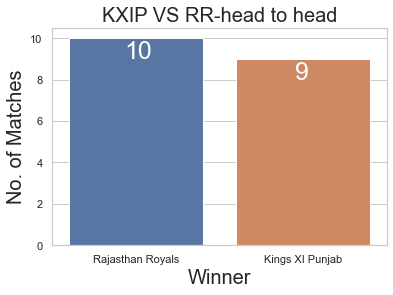

In [50]:
sns.countplot(RK["winner"])
plt.text(-0.07,9,str(RK['winner'].value_counts()['Rajasthan Royals']),size=25,color='white')
plt.text(0.95,8,str(RK['winner'].value_counts()['Kings XI Punjab']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('KXIP VS RR-head to head',fontsize = 20)

In [51]:
Season_wise_Match_Winner = pd.DataFrame(RK.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between KXIP VS RR :")
Season_wise_Match_Winner

Season wise winner of matches between KXIP VS RR :


winner count
season winner                        
2008   Kings XI Punjab              1
       Rajasthan Royals             1
2009   Kings XI Punjab              1
       Rajasthan Royals             1
2010   Rajasthan Royals             2
2011   Kings XI Punjab              1
2012   Rajasthan Royals             2
2013   Rajasthan Royals             2
2014   Kings XI Punjab              2
2015   Kings XI Punjab              1
       Rajasthan Royals             1
2018   Kings XI Punjab              1
       Rajasthan Royals             1
2019   Kings XI Punjab              2

### Winning Percentage

In [52]:
Winning_Percentage = RK['winner'].value_counts()/len(RK['winner'])

In [53]:
print("RR winning percentage against KXIP(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("KXIP winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

RR winning percentage against KXIP(overall) : 53%
KXIP winning percentage against RR(overall) : 47%


### Performance Analysis

In [54]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [55]:
performance("Kings XI Punjab",RK)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  26.0
Average wickets by which a given team wins while chasing :  6.0


In [56]:
performance("Rajasthan Royals",RK)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  37.0
Average wickets by which a given team wins while chasing :  7.0


## Toss Analysis

In [57]:
Toss_Decision = pd.DataFrame(RK.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner      toss_decision               
Kings XI Punjab  bat                        3
                 field                      7
Rajasthan Royals bat                        2
                 field                      7

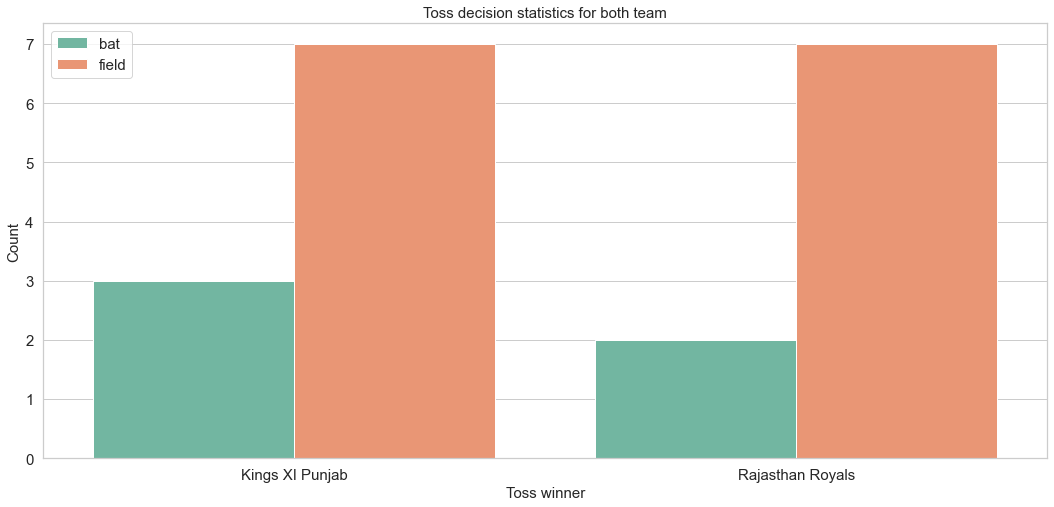

In [58]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(RK['toss_winner'],palette='Set2',hue=RK['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [59]:
Toss_Decision_based_Winner = pd.DataFrame(RK.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner      toss_decision winner                  
Kings XI Punjab  bat           Kings XI Punjab        1
                               Rajasthan Royals       2
                 field         Kings XI Punjab        3
                               Rajasthan Royals       4
Rajasthan Royals bat           Rajasthan Royals       2
                 field         Kings XI Punjab        5
                               Rajasthan Royals       2

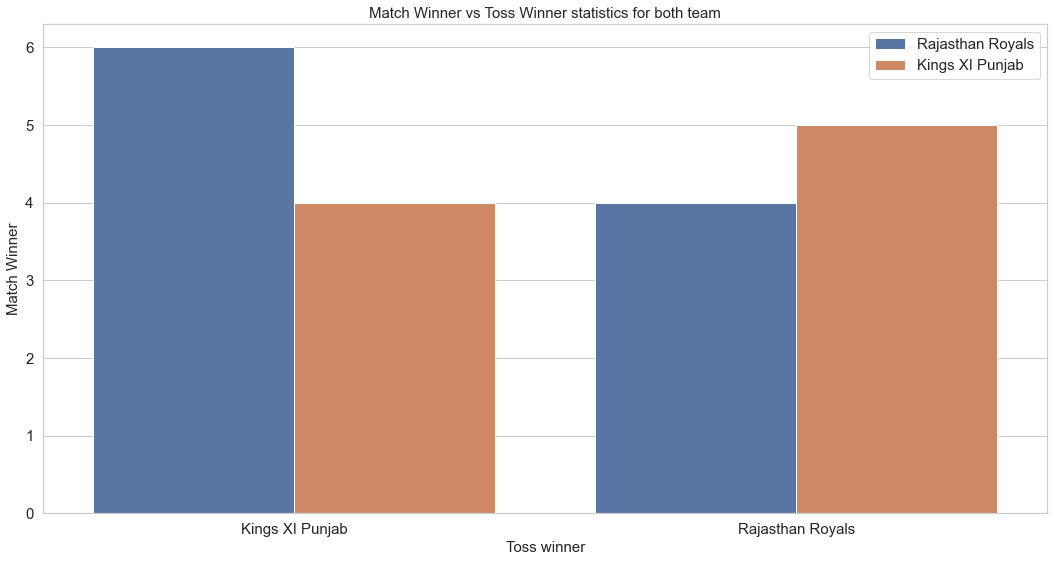

In [60]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RK['toss_winner'],hue=RK['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

We have been seeing this reverse pattern quite a few times now between toss winning and match winning percentage of teams. Here also we can see a reverse pattern again that toss winning team is generally not winning the matches. Out of the last 2-3 times this pattern occured we always found that it proved to be right.

### Toss Decision based Analysis of both the teams seperately :

In [61]:
KXIP = RK[RK["toss_winner"]=="Kings XI Punjab"]
RR = RK[RK["toss_winner"]=="Rajasthan Royals"]

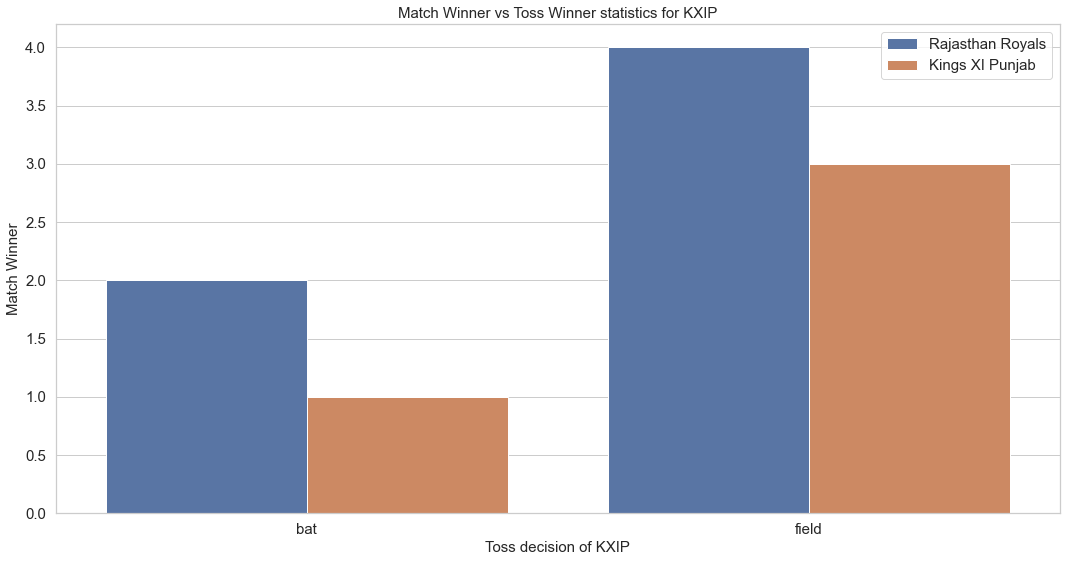

In [62]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KXIP['toss_decision'],hue=KXIP['winner'])
plt.title('Match Winner vs Toss Winner statistics for KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KXIP',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

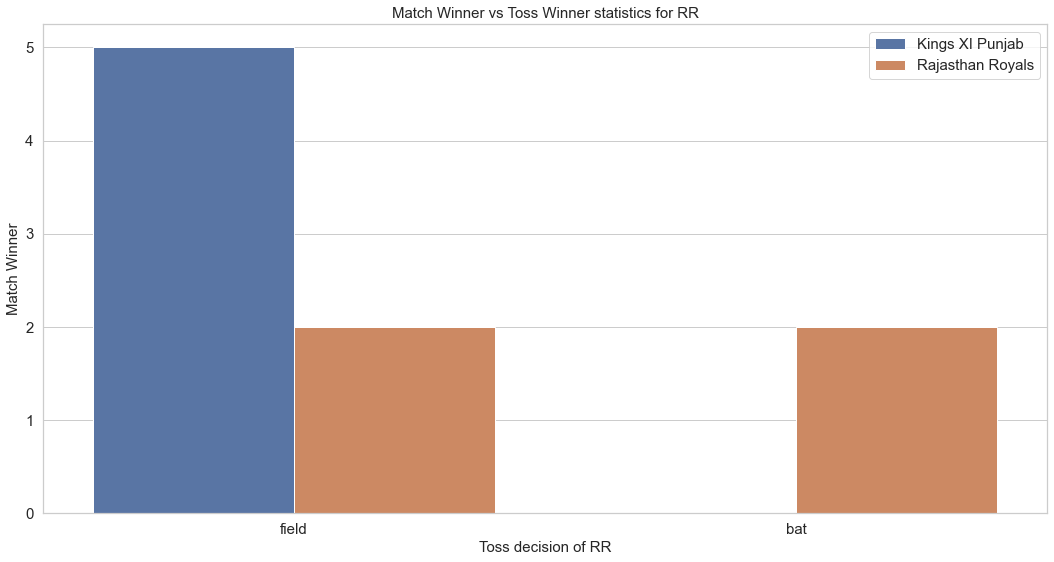

In [63]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RR['toss_decision'],hue=RR['winner'])
plt.title('Match Winner vs Toss Winner statistics for RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [64]:
player_of_the_match = pd.DataFrame(RK.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
SE Marsh,4
JP Faulkner,2
SR Watson,2
JC Buttler,1
KC Sangakkara,1
CH Gayle,1
AC Voges,1
GC Smith,1
MJ Lumb,1
AM Rahane,1


## Recent Year Performance Analysis

In [65]:
cond2 = RK["season"] == 2018
cond3 = RK["season"] == 2019
final = RK[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7931,2018,Indore,06/05/18,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,M Ur Rahman,Holkar Cricket Stadium
7933,2018,Jaipur,08/05/18,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,15,0,JC Buttler,Sawai Mansingh Stadium
11140,2019,Jaipur,25/03/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,14,0,CH Gayle,Sawai Mansingh Stadium
11323,2019,Mohali,16/04/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,12,0,R Ashwin,IS Bindra Stadium


In [66]:
final.shape

(4, 14)

In [67]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
JC Buttler,1
CH Gayle,1
R Ashwin,1
M Ur Rahman,1


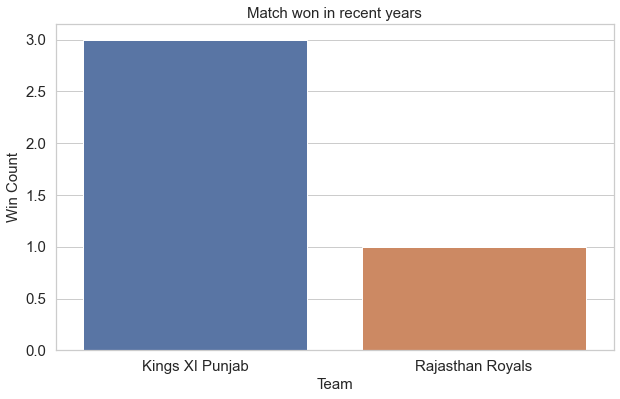

In [68]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head, Toss analysis,reverse pattern ,Performance Analysis, Recent year analysis etc we saw that chasing side has better chances of winning the match and also taking in consideration the reverse pattern which we observed we can predict that the team chasing the score will have better chances of winning the match. 